In [140]:
import pandas as pd
import urllib
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [141]:
df =pd.read_csv('autompg.csv',na_values='?')

In [142]:
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [143]:
df.shape

(398, 9)

In [144]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [145]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [146]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [147]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [148]:
df['car name']=le.fit_transform(df['car name'].astype(str))

In [149]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,49
1,15.0,8,350.0,165.0,3693,11.5,70,1,36
2,18.0,8,318.0,150.0,3436,11.0,70,1,231
3,16.0,8,304.0,150.0,3433,12.0,70,1,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,44.0,4,97.0,52.0,2130,24.6,82,2,301
395,32.0,4,135.0,84.0,2295,11.6,82,1,119
396,28.0,4,120.0,79.0,2625,18.6,82,1,159


In [150]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,49
1,15.0,8,350.0,165.0,3693,11.5,70,1,36
2,18.0,8,318.0,150.0,3436,11.0,70,1,231
3,16.0,8,304.0,150.0,3433,12.0,70,1,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,44.0,4,97.0,52.0,2130,24.6,82,2,301
395,32.0,4,135.0,84.0,2295,11.6,82,1,119
396,28.0,4,120.0,79.0,2625,18.6,82,1,159


In [151]:
df['car name'].unique()

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  65, 271, 156, 232, 162,  10, 242, 116, 129, 250,
         9,  64, 243, 151, 187, 208, 210, 123, 267,  76, 286, 218, 272,
       105, 293,  63, 158,   2, 192,  31, 203,  75, 183,  11,  48, 143,
       233, 295, 283, 212, 253, 157,  85, 279, 104, 268,  25,  55, 142,
       109, 193,  44, 148, 222,  74,  29,   0, 235,  62, 292, 128, 219,
       207, 263,  87, 174, 188, 121,  59, 244, 124, 209,  17, 294, 113,
       260, 276, 204,  61,  92,  50, 234,  27, 110,  21, 284,  88, 103,
       122, 167, 261, 127, 236, 194,  42, 224,  24,  41, 221,  34,  60,
       154, 266, 240, 287,  12, 296, 171, 125,  40, 254, 108,  51,  66,
       302, 100, 145, 252,  13,  91, 297, 239, 186,  39,  67, 132, 111,
       165,  32, 256, 216,  94, 202, 117, 189,  53,  35, 238, 144, 245,
        58,  70, 160, 288, 251, 269, 155, 107, 262,  89,  23, 18

In [152]:

df=df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,49
1,15.0,8,350.0,165.0,3693,11.5,70,1,36
2,18.0,8,318.0,150.0,3436,11.0,70,1,231
3,16.0,8,304.0,150.0,3433,12.0,70,1,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,44.0,4,97.0,52.0,2130,24.6,82,2,301
395,32.0,4,135.0,84.0,2295,11.6,82,1,119
396,28.0,4,120.0,79.0,2625,18.6,82,1,159


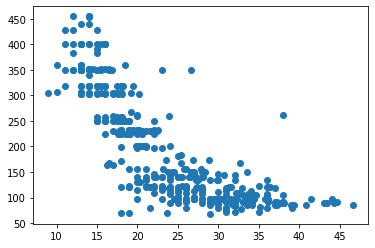

In [153]:
plt.scatter(df['mpg'],df['displacement'])

<function matplotlib.pyplot.show(*args, **kw)>

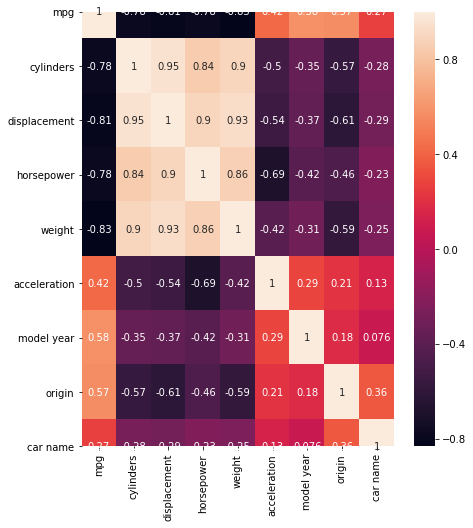

In [154]:
corr_hmap=df.corr()
plt.figure(figsize=(7,8))
sns.heatmap(corr_hmap,annot=True)
plt.show

In [155]:
x=df.iloc[:,0:8]
x

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [156]:
y=df.iloc[:,8].values

In [157]:
y

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  95,  65, 271,   7, 232,  49, 162,  10,  54, 242,
       141, 223, 116, 129, 250,   9,  64, 243, 151, 187, 208, 210, 123,
       267,  76, 286, 218, 272, 105, 293,  63, 158,  54, 241, 223, 141,
         2, 192,  31, 203,  75, 183,  11,  48, 143, 233, 295, 283, 212,
       253, 157,  85, 279, 104, 268,  25,  10,  55, 142, 109, 193,  44,
       148, 222,  74,  29,   0, 235,  62,   8, 150, 220, 292,  54, 128,
       219, 207,   7, 263,  63,  87, 174, 156, 188, 121,  59, 244, 124,
       209,  17, 294, 113, 260, 276, 204, 220,   8,  61,  92, 156, 267,
        63,  50,  10, 234, 142,  27, 110, 143,  11,  21, 284, 209, 271,
        88, 103, 124, 122, 167, 261, 127, 236,  61, 194, 150, 241,  42,
       224, 148,  24,  41,  10, 221,  34,  60, 154, 266, 156,   7, 240,
       271, 284,  88, 156, 287,  12,  17, 211, 296, 260, 171, 12

In [158]:
y=y.reshape(-1,1)

In [159]:
y

array([[ 49],
       [ 36],
       [231],
       [ 14],
       [161],
       [141],
       [ 54],
       [223],
       [241],
       [  1],
       [101],
       [215],
       [ 57],
       [ 30],
       [274],
       [220],
       [  8],
       [150],
       [ 95],
       [282],
       [211],
       [ 16],
       [258],
       [ 22],
       [  7],
       [133],
       [ 68],
       [112],
       [163],
       [ 95],
       [ 65],
       [271],
       [  7],
       [232],
       [ 49],
       [162],
       [ 10],
       [ 54],
       [242],
       [141],
       [223],
       [116],
       [129],
       [250],
       [  9],
       [ 64],
       [243],
       [151],
       [187],
       [208],
       [210],
       [123],
       [267],
       [ 76],
       [286],
       [218],
       [272],
       [105],
       [293],
       [ 63],
       [158],
       [ 54],
       [241],
       [223],
       [141],
       [  2],
       [192],
       [ 31],
       [203],
       [ 75],
       [183],
      

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [161]:
x_train.shape

(313, 8)

In [162]:
y_train.shape

(313, 1)

In [163]:
x_test.shape

(79, 8)

In [164]:
y_test.shape

(79, 1)

In [165]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [166]:
model=[MultinomialNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [167]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    mscores= cross_val_score(m,x,y,cv=5)
    print(mscores)
    print(mscores.mean(),mscores.std())
    print('\n')
    

0.0759493670886076
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00       

[0.00996678 0.07142857 0.09090909 0.1        0.        ]
0.05446088794926005 0.041559352009019425


0.0
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       

[0.04651163 0.21428571 0.13636364 0.2        0.33333333]
0.18609886237793213 0.09447107326490829




In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [169]:
lm=LinearRegression()

In [170]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
lm.intercept_

array([212.81249245])

In [172]:
lm.score(x_train,y_train)

0.11560315312896674

In [174]:
pred=lm.predict(x_test)
print("Pridicted result car:",pred)
print("Actual car:",y_test)

Pridicted result car: [[163.79206318]
 [152.105109  ]
 [194.55753104]
 [122.22456361]
 [137.26298779]
 [187.29488608]
 [148.10989053]
 [179.8871913 ]
 [130.01871753]
 [160.54891613]
 [118.04588898]
 [170.89181365]
 [123.92544914]
 [194.35374615]
 [142.70020759]
 [124.28484556]
 [129.26940393]
 [194.26088501]
 [145.51961712]
 [181.90306256]
 [135.15767402]
 [177.47054339]
 [188.0531467 ]
 [129.26242859]
 [156.33410252]
 [163.64848534]
 [174.20886278]
 [137.51271963]
 [150.63209987]
 [162.57174603]
 [137.52958696]
 [119.29133486]
 [112.74835929]
 [200.76958325]
 [136.52532342]
 [197.02330109]
 [147.49339908]
 [128.96962154]
 [133.96658396]
 [120.65633927]
 [132.37379281]
 [153.69306847]
 [161.45273065]
 [168.94043618]
 [144.6906721 ]
 [126.95022096]
 [139.46251921]
 [183.86793784]
 [120.50089353]
 [159.75764377]
 [130.23876808]
 [185.85473934]
 [142.90942572]
 [193.48158536]
 [ 98.25493179]
 [128.41405358]
 [116.3181968 ]
 [114.67287247]
 [166.65086509]
 [192.44160984]
 [129.42959972]
 [